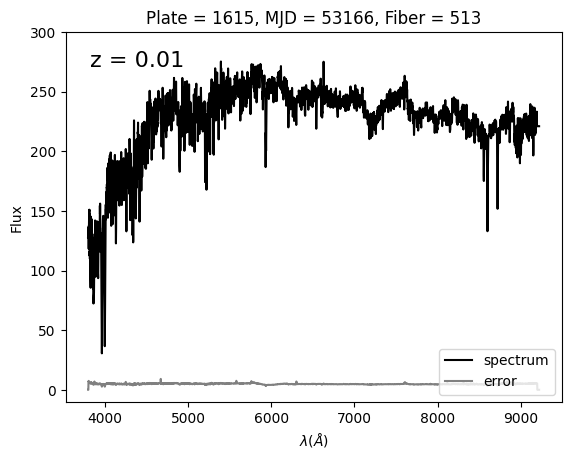

In [91]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
#   The figure is an example from astroML: see http://astroML.github.com
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_spectrum

#------------------------------------------------------------
# Fetch single spectrum
plate = 1615
mjd = 53166
fiber = 513

spec = fetch_sdss_spectrum(plate, mjd, fiber)

#------------------------------------------------------------
# Plot the resulting spectrum
ax = plt.axes()
ax.plot(spec.wavelength(), spec.spectrum, '-k', label='spectrum')
ax.plot(spec.wavelength(), spec.error, '-', color='gray', label='error')

ax.legend(loc=4)

ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

ax.text(0.05, 0.95, 'z = %.2f' % spec.z, size=16,
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')

ax.set_ylim(-10, 300)

plt.show()

In [185]:
spec.wavelength()

array([3795.77097003, 3796.64507922, 3797.51938971, ..., 9217.22098659,
       9219.34357452, 9221.46665124])

In [7]:
len(spec.wavelength())

3856

In [11]:
spec.spectrum

array([127.768, 127.742, 127.716, ..., 221.066, 221.068, 221.07 ],
      dtype='>f4')

In [46]:
len(spec.spectrum)

3856

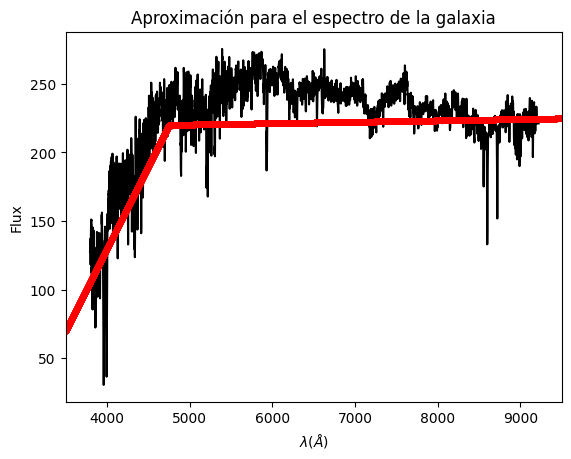

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astroML.datasets import fetch_sdss_spectrum, fetch_sdss_filter


fig = plt.figure()
ax = fig.add_subplot(111)

# Fetch single spectrum
plate = 1615
mjd = 53166
fiber = 513

spec = fetch_sdss_spectrum(plate, mjd, fiber)

m_1=0.120
b=-350
lambda_corte=4750
m_2=100/100000

def trozos(x):
    if x < lambda_corte:
        ec=m_1 * x + b
        if ec<0:
            return 50
        else:
            return ec
        # Segunda recta: Conexión suave entre x=5500 y x=9500
    else:
        return m_2*(x-lambda_corte)+(m_1*lambda_corte+b)
    

trozos=np.vectorize(trozos)
x = np.linspace(3500, 9500,50000)
y = [trozos(xi) for xi in x]


plt.plot(spec.wavelength(), spec.spectrum, '-k', label='Espectro original')
plt.plot(x, y, '.r', lw=2)

ax.set_xlim(3500,9500)

ax.set_title('Aproximación para el espectro de la galaxia')
ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')
plt.show()


### Filtros

In [60]:
for f, c, loc in zip('u',"b", [3500]):
    data_u = fetch_sdss_filter(f)

In [61]:
for f,c,loc in zip("g","g",[4600]):
    data_g=fetch_sdss_filter(f)

In [62]:
for f, c, loc in zip('r',"r", [6100]):
    data_r = fetch_sdss_filter(f)   

In [63]:
for f, c, loc in zip('i',"m", [7500]):
    data_i = fetch_sdss_filter(f)

In [64]:
for f, c, loc in zip('z',"k", [8800]):
    data_z = fetch_sdss_filter(f)   

In [187]:
spec.wavelength()

array([3795.77097003, 3796.64507922, 3797.51938971, ..., 9217.22098659,
       9219.34357452, 9221.46665124])

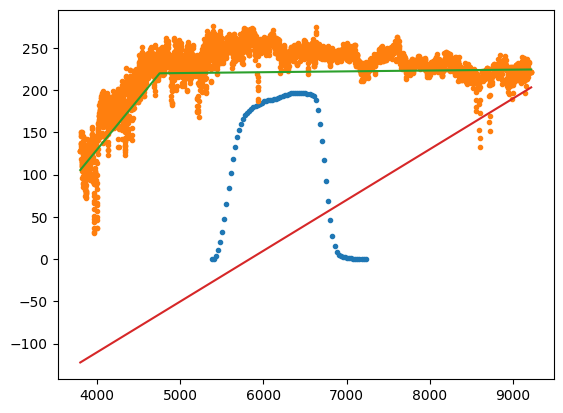

In [155]:
plt.plot(data_r[0], data_r[1]*400,".")
plt.plot(spec.wavelength(),spec.spectrum,".")
x=spec.wavelength()
y=trozos(x)
plt.plot(x,y)
zz=1
y_2=trozos(x/(zz+1))
plt.plot(x,y_2)

In [77]:
from scipy import interpolate

In [78]:
f=interpolate.interp1d(spec.wavelength(), spec.spectrum, fill_value=0, bounds_error=False)

In [79]:
f(6004)

array(258.10051176)

In [186]:
data_r[0]

array([5380., 5405., 5430., 5455., 5480., 5505., 5530., 5555., 5580.,
       5605., 5630., 5655., 5680., 5705., 5730., 5755., 5780., 5805.,
       5830., 5855., 5880., 5905., 5930., 5955., 5980., 6005., 6030.,
       6055., 6080., 6105., 6130., 6155., 6180., 6205., 6230., 6255.,
       6280., 6305., 6330., 6355., 6380., 6405., 6430., 6455., 6480.,
       6505., 6530., 6555., 6580., 6605., 6630., 6655., 6680., 6705.,
       6730., 6755., 6780., 6805., 6830., 6855., 6880., 6905., 6930.,
       6955., 6980., 7005., 7030., 7055., 7080., 7105., 7130., 7155.,
       7180., 7205., 7230.])

In [135]:
#Hacemos el cálculo para el filtro r con z=0.01

producto_r=[]

for k in range(len(data_r[0])-1):
    Delta_lam=(data_r[0][k+1]-data_r[0][k])
    # Cálculo del producto: (filtro)(flujo)(d\lambda)
    producto_r.append(data_r[1][k]* trozos(data_r[0][k]) *Delta_lam)
    
I_r=sum(producto_r)
I_r

130900.10895000002

In [69]:
#Hacemos el cálculo para el filtro g con z=0.01

producto_g=[]

for k in range(len(data_g[0])-1):
    Delta_lam=(data_g[0][k+1]-data_g[0][k])
    # Cálculo del producto: (filtro)(flujo)(d\lambda)
    producto_g.append(data_g[1][k]* trozos(data_g[0][k]) *Delta_lam)


I_g=sum(producto_g)
I_g

87601.83269999998

In [70]:
#Calculamos la magnitud absoluta para los filtros g y r
import math as m
mag_abs_gr=-2.5*m.log(I_g/I_r)
mag_abs_gr


1.0040814656846893

### Ahora, para el filtro g a cualquier redshift z

In [148]:
len(producto_g)

88

In [161]:
zz = np.linspace(0.01, 1, 88)


I_U=[]

for s in range(len(zz)):
    producto_U=[]
    for k in range(len(data_u[0])-1):
        Delta_lam=(data_u[0][k+1]-data_u[0][k])
        # Cálculo del producto: (filtro)(flujo)(d\lambda)
        producto_U.append(data_u[1][k]* trozos(data_u[0][k]/(zz[s]+1)) *Delta_lam)
        
    I_uu=sum(producto_U)
    I_U.append(I_uu)
    
I_U

[4433.96410891089,
 4148.310347738012,
 3869.078555926546,
 3596.465373183621,
 3330.85608461287,
 3079.4389301874576,
 2836.188719219701,
 2608.2549525316454,
 2438.7475649859057,
 2258.4429169249825,
 2097.774156182879,
 2037.2086421628183,
 1926.3766090225552,
 1834.2706968433577,
 1867.2594441167769,
 1817.17898656542,
 1783.7942652588945,
 1894.6193123209157,
 1902.645153278456,
 1925.2803290213722,
 2095.6278559487323,
 2149.0696438431796,
 2215.86111491108,
 2428.3966784164845,
 2512.6154058048905,
 2599.8972296217357,
 2785.603888302086,
 2854.464947643979,
 2913.9296197767976,
 2994.473134328358,
 3010.6862656289873,
 3019.1984058704456,
 3026.8402948557086,
 3027.9544425087106,
 3028.6431066403356,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.375,
 3029.3

In [162]:
zz = np.linspace(0.01, 1, 88)


I_G=[]

for s in range(len(zz)):
    producto_G=[]
    for k in range(len(data_g[0])-1):
        Delta_lam=(data_g[0][k+1]-data_g[0][k])
        # Cálculo del producto: (filtro)(flujo)(d\lambda)
        producto_G.append(data_g[1][k]* trozos(data_g[0][k]/(zz[s]+1)) *Delta_lam)
        
    I_gg=sum(producto_G)
    I_G.append(I_gg)
    
I_G

[81907.14891707918,
 80511.69175599258,
 79031.8577007513,
 77465.89334957069,
 75818.28570381408,
 74090.19624838396,
 72283.1134044212,
 70399.30955181962,
 68441.97127975256,
 66415.4495513019,
 64347.11186924672,
 62269.144984052255,
 60209.462389285705,
 58183.059394356744,
 56193.48395163664,
 54241.197953417075,
 52325.737944749766,
 50446.218142908314,
 48601.7084753761,
 46791.32945725536,
 45014.22723599889,
 43269.50733020429,
 41556.68262653896,
 39876.84372288502,
 38226.74758129535,
 36606.53498934467,
 35023.07861103776,
 33469.60586387434,
 31955.71515702049,
 30548.949999999975,
 29156.46545036996,
 27822.595673076925,
 26718.645069008784,
 25536.686436037813,
 24413.71893359665,
 23598.745237512234,
 22604.63613067766,
 21661.536397590342,
 21066.361259861325,
 20234.15757827325,
 19448.74471640385,
 19039.347582905182,
 18357.164600231747,
 17719.924862005515,
 17484.229057292854,
 16945.591436338902,
 16449.06040026983,
 16371.390982142859,
 15966.716397075108,
 156

In [163]:
zz = np.linspace(0.01, 1, 88)


I_R=[]

for s in range(len(zz)):
    producto_R=[]
    for k in range(len(data_r[0])-1):
        Delta_lam=(data_r[0][k+1]-data_r[0][k])
        # Cálculo del producto: (filtro)(flujo)(d\lambda)
        producto_R.append(data_r[1][k]* trozos(data_r[0][k]/(zz[s]+1))*Delta_lam)
        
    I_rr=sum(producto_R)
    I_R.append(I_rr)
    
I_R

[120902.27861386136,
 120865.01638462192,
 120828.57529298832,
 120792.92849199142,
 120758.05029238816,
 120723.91610092114,
 120690.50236248801,
 120657.78650593352,
 120625.74689320389,
 120594.36277162118,
 120563.61422905793,
 120533.48215180739,
 120503.38470206765,
 120467.28574188508,
 120409.6040611177,
 120304.30401321553,
 120124.77484813423,
 119851.0054247851,
 119471.3052196281,
 118980.1617748172,
 118375.83071276813,
 117655.63104638319,
 116821.56412089602,
 115876.2364059111,
 114821.23510900968,
 113658.86291655568,
 112391.23531489301,
 111017.74569371731,
 109539.362166007,
 107959.94179104474,
 106281.53067619287,
 104506.53025366901,
 102637.30175329362,
 100675.2631365107,
 98622.37842554307,
 96490.10913840598,
 94299.82861610393,
 92081.58689126505,
 89865.73947107335,
 87673.16129684536,
 85511.01809058011,
 83380.51439455862,
 81281.76479432211,
 79214.45696555887,
 77178.04982795028,
 75171.98154734932,
 73195.67164380474,
 71248.47702008928,
 69329.7589851

In [164]:
zz = np.linspace(0.01, 1, 88)


I_I=[]

for s in range(len(zz)):
    producto_I=[]
    for k in range(len(data_i[0])-1):
        Delta_lam=(data_i[0][k+1]-data_i[0][k])
        # Cálculo del producto: (filtro)(flujo)(d\lambda)
        producto_I.append(data_i[1][k]* trozos(data_i[0][k]/(zz[s]+1)) *Delta_lam)
        
    I_ii=sum(producto_I)
    I_I.append(I_ii)
    
I_I

[98456.5067636139,
 98419.92844572928,
 98384.1561942822,
 98349.16365505283,
 98314.92561029889,
 98281.41791814803,
 98248.6174558283,
 98216.50206645572,
 98185.0505091215,
 98154.24241204276,
 98124.05822855936,
 98094.47919577762,
 98065.48729567665,
 98037.06521850807,
 98009.19632833233,
 97981.86463054907,
 97955.05474128583,
 97928.75185852431,
 97902.94173484958,
 97877.6106517154,
 97852.74539513096,
 97828.33323267534,
 97804.36189175789,
 97780.81953904555,
 97757.69476098492,
 97734.97654535163,
 97712.65426376423,
 97690.71765510466,
 97669.1568097911,
 97647.9621548507,
 97627.12443974866,
 97606.63077081226,
 97586.4189239335,
 97566.44560073422,
 97546.70785454214,
 97526.97162310238,
 97506.41580034005,
 97482.17701957833,
 97446.16464558929,
 97384.03223731025,
 97274.89376103206,
 97099.09028929238,
 96842.52560110077,
 96496.3731500115,
 96060.53678997373,
 95543.66330680785,
 94944.06254497415,
 94267.15359737726,
 93514.34751814204,
 92688.49076413331,
 91792.73

In [81]:
zz = np.linspace(0.01, 1, 88)


I_Z=[]

for s in range(len(zz)):
    producto_Z=[]
    for k in range(len(data_z[0])-1):
        Delta_lam=(data_z[0][k+1]-data_z[0][k])
        # Cálculo del producto: (filtro)(flujo)(d\lambda)
        producto_Z.append(data_z[1][k]* trozos(data_z[0][k]/(zz[s]+1)) *Delta_lam)
        
    I_zz=sum(producto_Z)
    I_Z.append(I_zz)
    
I_Z

[21451.20118811882,
 21442.45224763674,
 21433.896105175296,
 21425.526457232514,
 21417.337272133293,
 21409.322775533277,
 21401.477436840425,
 21393.79595648734,
 21386.273253993106,
 21378.904456757606,
 21371.684889536664,
 21364.61006455042,
 21357.67567218044,
 21350.8775722156,
 21344.211785608943,
 21337.674486711447,
 21331.261995950237,
 21324.970772922657,
 21318.79740987795,
 21312.738625562426,
 21306.791259403715,
 21300.95226601326,
 21295.218709986315,
 21289.58776098155,
 21284.056689062072,
 21278.62286028238,
 21273.283732505955,
 21268.036851439778,
 21262.87984687256,
 21257.810429104502,
 21252.826385557542,
 21247.92557755566,
 21243.10593726476,
 21238.365464783466,
 21233.70222537645,
 21229.11434684134,
 21224.597983665302,
 21220.142714759044,
 21215.73699946212,
 21211.34435039136,
 21206.863320487177,
 21202.009812295644,
 21196.284822132107,
 21188.813933992635,
 21178.551156414058,
 21164.04418441323,
 21144.2913250506,
 21118.4573842076,
 21086.31268806

###  Calculo de magnitud para los filtros 

In [165]:
#Calculamos la magnitud para los filtros g y r

mag_abs_GR=-2.5*np.log(np.array(I_G)/np.array(I_R))
mag_abs_GR

array([ 0.97349082,  1.01567986,  1.06130444,  1.11059998,  1.16362365,
        1.22055759,  1.28159725,  1.34693718,  1.41676625,  1.49125709,
        1.5697137 ,  1.65115384,  1.7346208 ,  1.81945998,  1.90524623,
        1.99145918,  2.07760655,  2.16335392,  2.24854384,  2.33314713,
        2.41721492,  2.50078452,  2.58397334,  2.66681724,  2.74960243,
        2.83243689,  2.91494681,  2.9976308 ,  3.07983228,  3.15607483,
        3.23353709,  3.30850269,  3.36459948,  3.42946005,  3.49038243,
        3.52061741,  3.57081087,  3.61784207,  3.62659814,  3.6656092 ,
        3.70215676,  3.6922672 ,  3.71975439,  3.74367279,  3.71203953,
        3.72442717,  3.73216983,  3.67659521,  3.67091977,  3.65939025,
        3.57728111,  3.55006847,  3.51621083,  3.47558443,  3.35805364,
        3.30174726,  3.23851877,  3.09756828,  3.0189103 ,  2.93324605,
        2.77042981,  2.66997184,  2.56280281,  2.38092734,  2.2604443 ,
        2.13384769,  1.93731305,  1.79982358,  1.65704505,  1.45

In [169]:
#Calculamos la magnitud para los filtros u y g

mag_abs_UG=-2.5*np.log(np.array(I_U)/np.array(I_G))
mag_abs_UG

array([7.29073065, 7.41425327, 7.54208663, 7.67471558, 7.81277537,
       7.95133951, 8.09532347, 8.23875515, 8.33625409, 8.45313526,
       8.55853799, 8.5497137 , 8.60547172, 8.64236819, 8.51082247,
       8.4903886 , 8.44686416, 8.20472463, 8.10103395, 7.97656584,
       7.6678135 , 7.50603286, 7.32854312, 6.9964114 , 6.80552816,
       6.61188715, 6.32885637, 6.15438331, 5.98712122, 5.80640504,
       5.6762716 , 5.55214279, 5.44460593, 5.33057203, 5.21757632,
       5.13209304, 5.02449674, 4.91795461, 4.84830297, 4.74753954,
       4.6485655 , 4.59537859, 4.50415903, 4.41583344, 4.38235738,
       4.30412845, 4.22978007, 4.21794758, 4.15537501, 4.09777384,
       4.10982544, 4.06600683, 4.02780978, 3.99530518, 4.03857234,
       4.01942239, 4.00593763, 4.06884926, 4.06806906, 4.07281659,
       4.15315229, 4.16947388, 4.19075118, 4.28487171, 4.31561941,
       4.35037259, 4.45281631, 4.49381463, 4.53753399, 4.64031391,
       4.68244435, 4.72049227, 4.78128037, 4.79975636, 4.81239

In [170]:
#Calculamos la magnitud para los filtros r e i

mag_abs_RI=-2.5*np.log(np.array(I_R)/np.array(I_I))
mag_abs_RI

array([-0.51341927, -0.51357762, -0.51373258, -0.51388426, -0.51403277,
       -0.5141782 , -0.51432065, -0.5144602 , -0.51459696, -0.51473099,
       -0.51486239, -0.51499122, -0.51510587, -0.51508151, -0.51459496,
       -0.51310498, -0.51005561, -0.50502289, -0.49774905, -0.48809736,
       -0.47600205, -0.46136934, -0.44419625, -0.42448564, -0.40221132,
       -0.37735509, -0.34988721, -0.31970878, -0.28674535, -0.25097865,
       -0.21234038, -0.17076033, -0.12615775, -0.0784162 , -0.0274172 ,
        0.02672116,  0.08359702,  0.14248641,  0.20245824,  0.26261608,
        0.32223923,  0.38079341,  0.43791129,  0.49336651,  0.54715874,
        0.59951194,  0.65037904,  0.69989842,  0.74810159,  0.79505586,
        0.84083545,  0.88552995,  0.92919662,  0.97269815,  1.01569605,
        1.05795479,  1.09955552,  1.140589  ,  1.18109629,  1.22113796,
        1.26076337,  1.30003692,  1.33911321,  1.37836291,  1.4183794 ,
        1.45974131,  1.50284046,  1.54790784,  1.59512092,  1.64

In [171]:
#Calculamos la magnitud para los filtros i y z

mag_abs_IZ=-2.5*np.log(np.array(I_I)/np.array(I_Z))
mag_abs_IZ

array([-3.80958563, -3.8096765 , -3.80976544, -3.80985251, -3.80993777,
       -3.81002126, -3.81010305, -3.81018319, -3.81026172, -3.8103387 ,
       -3.81041417, -3.81048817, -3.81056075, -3.81063195, -3.81070181,
       -3.81077035, -3.81083763, -3.81090367, -3.81096852, -3.81103219,
       -3.81109473, -3.81115615, -3.81121651, -3.81127581, -3.81133409,
       -3.81139137, -3.81144768, -3.81150304, -3.81155749, -3.81161103,
       -3.81166369, -3.8117154 , -3.81176479, -3.811811  , -3.81185418,
       -3.81188853, -3.81189347, -3.81179676, -3.81139213, -3.81031527,
       -3.80804014, -3.80409007, -3.79815072, -3.79008006, -3.77997413,
       -3.76819909, -3.75479487, -3.73996349, -3.72372683, -3.70616042,
       -3.6872792 , -3.66713501, -3.64568489, -3.62371555, -3.60076524,
       -3.57646562, -3.55072738, -3.52355717, -3.49487857, -3.46466761,
       -3.43284453, -3.39926182, -3.36391223, -3.32705655, -3.28915104,
       -3.25064559, -3.21180579, -3.17272079, -3.13336784, -3.09

###  Gráficas: color vs z 

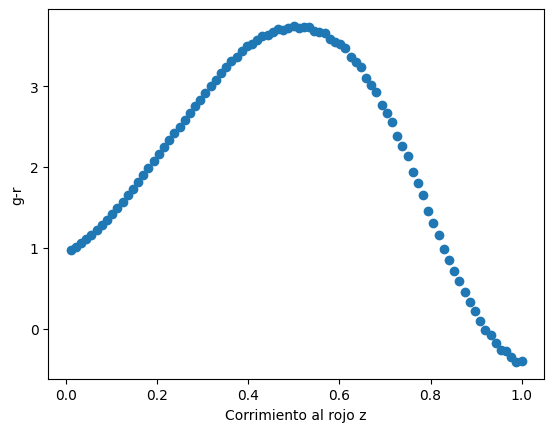

In [172]:
#Graficamos color (g-r) vs z
plt.scatter(zz,mag_abs_GR)
plt.xlabel("Corrimiento al rojo z")
plt.ylabel("g-r")
plt.show()

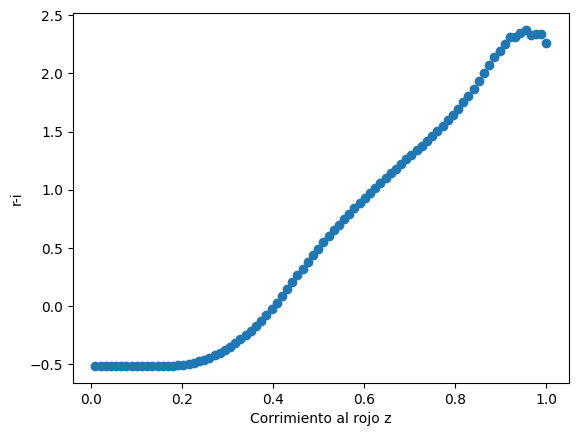

In [173]:
#Graficamos color (r-i) vs z
plt.scatter(zz,mag_abs_RI)
plt.xlabel("Corrimiento al rojo z")
plt.ylabel("r-i")
plt.show()

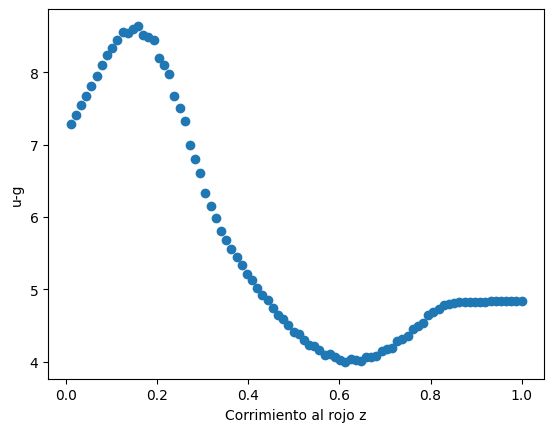

In [174]:
#Graficamos color (u-g) vs z
plt.scatter(zz,mag_abs_UG)
plt.xlabel("Corrimiento al rojo z")
plt.ylabel("u-g")
plt.show()

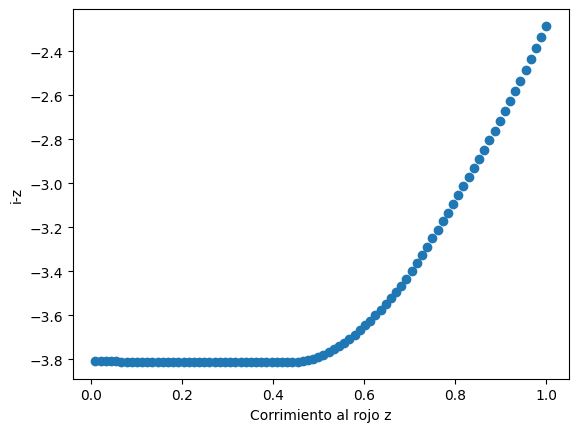

In [175]:
#Graficamos color (i-z) vs z
plt.scatter(zz,mag_abs_IZ)
plt.xlabel("Corrimiento al rojo z")
plt.ylabel("i-z")
plt.show()

### Gráficas: color vs color 

Text(0, 0.5, 'r-i')

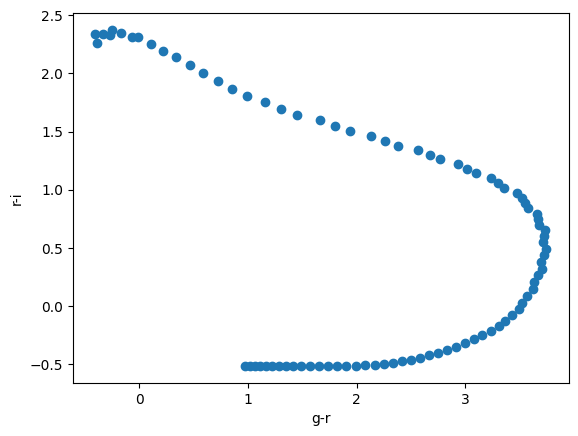

In [176]:
#Gráfica r-i vs g-r
plt.scatter(mag_abs_GR,mag_abs_RI)
plt.xlabel("g-r")
plt.ylabel("r-i")

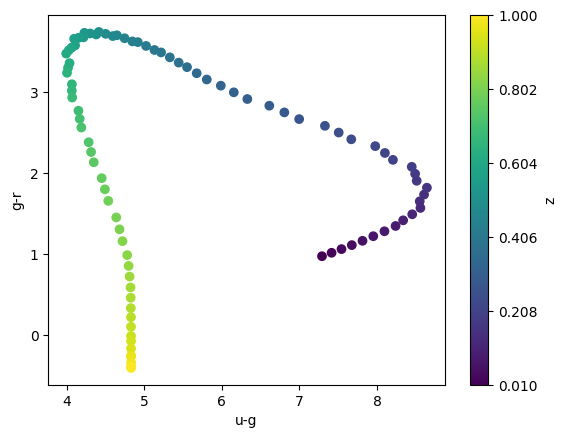

In [184]:
#Gráfica u-g vs g-r

plt.scatter(mag_abs_UG,mag_abs_GR, c=zz)
plt.xlabel("u-g")
plt.ylabel("g-r")
plt.colorbar(ticks=np.linspace(0.01, 1, 6)).set_label('z')



Text(0, 0.5, 'i-z')

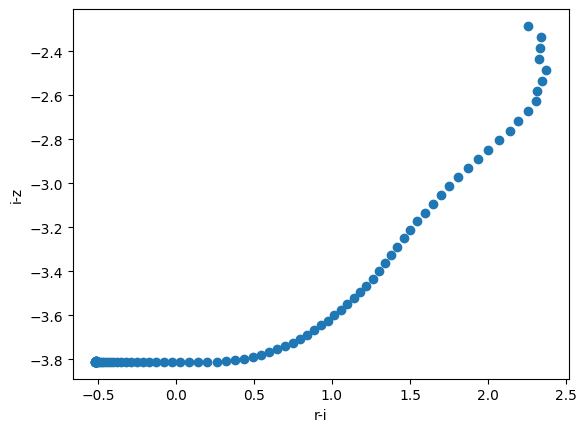

In [178]:
#Gráfica r-i vs i-z
plt.scatter(mag_abs_RI,mag_abs_IZ)
plt.xlabel("r-i")
plt.ylabel("i-z")

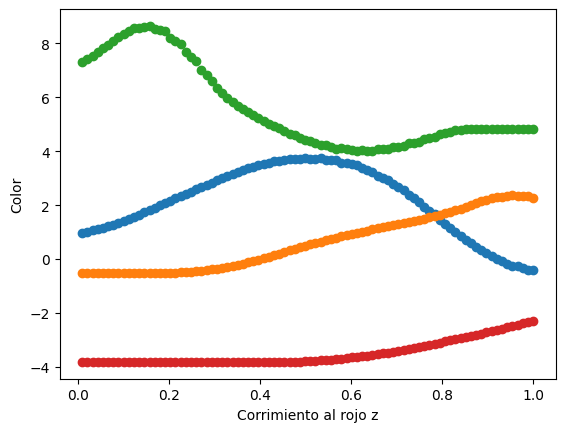

In [179]:
# Gráfica: 
plt.scatter(zz,mag_abs_GR)
plt.scatter(zz,mag_abs_RI)
plt.scatter(zz,mag_abs_UG)
plt.scatter(zz,mag_abs_IZ)

plt.xlabel("Corrimiento al rojo z")
plt.ylabel("Color")
plt.show()